Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


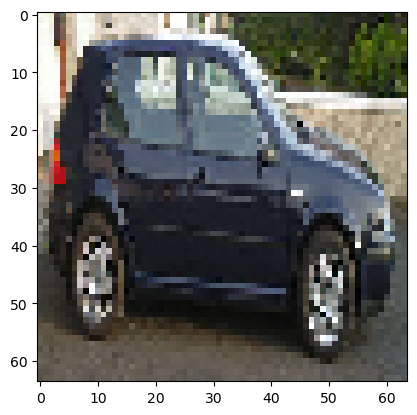

In [246]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

data_gen = ImageDataGenerator(rescale=1.0 / 255)
data_gen_aug = ImageDataGenerator(
    rescale=1.0 / 255, horizontal_flip=True, vertical_flip=True
)


img_size = 64
batch_size = 32

train_generator = data_gen_aug.flow_from_directory(
    "./train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    classes=["other", "car"],
    seed=12345,
    shuffle=True,
)

Xbatch_aug, Ybatch_aug = train_generator.next()

train_generator = data_gen.flow_from_directory(
    "./train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    classes=["other", "car"],
    seed=12345,
    shuffle=True,
)

Xbatch, Ybatch = train_generator.next()

validation_generator = data_gen.flow_from_directory(
    "./validation",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    classes=["other", "car"],
    seed=12345,
    shuffle=True,
)

x_test, y_test = validation_generator.next()

Xbatch.shape
Ybatch.shape
plt.imshow(Xbatch[4])

In [247]:
def make_convnet():
    model = Sequential()
    model.add(Conv2D(8, (3, 3), activation="relu", input_shape=(img_size, img_size, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy",
        optimizer=(SGD(learning_rate=0.01, decay=0.1, momentum=0.1, nesterov=True)),
        metrics=["accuracy"],
    )
    return model


model = make_convnet()
model_aug = make_convnet()

# model.summary()
epochs = 100
history = model.fit(
    Xbatch,
    Ybatch,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(x_test, y_test),
)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
history_aug = model_aug.fit(
    Xbatch_aug,
    Ybatch_aug,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(x_test, y_test),
)
score_aug = model_aug.evaluate(x_test, y_test, verbose=0)
print("Augmented Test loss:", score_aug[0])
print("Augmented Test accuracy:", score_aug[1])

Test loss: 0.6822096109390259
Test accuracy: 0.59375
Augmented Test loss: 0.6798267364501953
Augmented Test accuracy: 0.59375


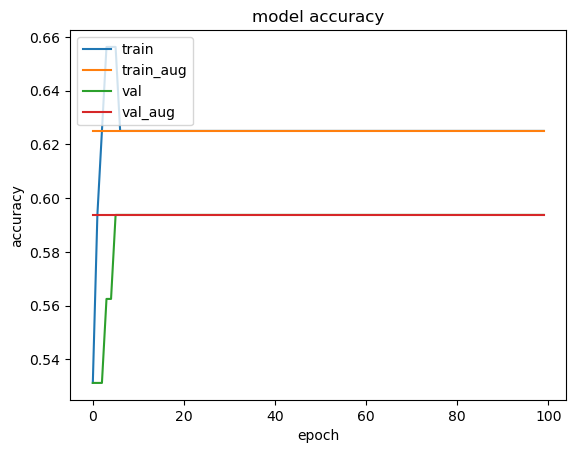

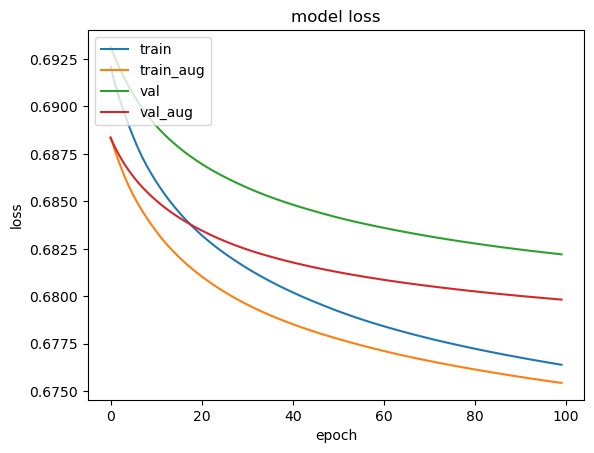

In [248]:
plt.plot(history.history["accuracy"])
plt.plot(history_aug.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history_aug.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "train_aug", "val", "val_aug"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history_aug.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history_aug.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "train_aug", "val", "val_aug"], loc="upper left")
plt.show()

With the chosen CNN the accuracy score is the same but the loss is lower on the augmented data, not by much though.